In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('banknotes_full.csv')
data.iloc[1:5]

,id,V1,V2,V3,V4,Class
1,2,4.54590,8.1674,-2.4586,-1.46210,1
2,3,3.86600,-2.6383,1.9242,0.10645,1
3,4,3.45660,9.5228,-4.0112,-3.59440,1
4,5,0.32924,-4.4552,4.5718,-0.98880,1


In [3]:
data.iloc[-5:-1]

,id,V1,V2,V3,V4,Class
1367,1368,0.40614,1.3492,-1.4501,-0.55949,2
1368,1369,-1.38870,-4.8773,6.4774,0.34179,2
1369,1370,-3.75030,-13.4586,17.5932,-2.77710,2
1370,1371,-3.56370,-8.3827,12.3930,-1.28230,2


In [4]:
selected_columns = ['V1','V2','Class']
data = data[selected_columns]
data.iloc[1:5]

,V1,V2,Class
1,4.54590,8.1674,1
2,3.86600,-2.6383,1
3,3.45660,9.5228,1
4,0.32924,-4.4552,1


In [5]:
data['Class'] = data['Class'] - 1
data.describe()

,V1,V2,Class
count,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,0.444606
std,2.842763,5.869047,0.497103
min,-7.042100,-13.773100,0.000000
25%,-1.773000,-1.708200,0.000000
50%,0.496180,2.319650,0.000000
75%,2.821475,6.814625,1.000000
max,6.824800,12.951600,1.000000


In [6]:
data[data['Class'] == 0].describe()

,V1,V2,Class
count,762.000000,762.000000,762.0
mean,2.276686,4.256627,0.0
std,2.019348,5.138792,0.0
min,-4.285900,-6.932100,0.0
25%,0.883345,0.450063,0.0
50%,2.553100,5.668800,0.0
75%,3.884450,8.691975,0.0
max,6.824800,12.951600,0.0


In [7]:
data[data['Class'] == 1].describe()

,V1,V2,Class
count,610.000000,610.000000,610.0
mean,-1.868443,-0.993576,1.0
std,1.881183,5.404884,0.0
min,-7.042100,-13.773100,1.0
25%,-3.061450,-5.810025,1.0
50%,-1.806100,0.172775,1.0
75%,-0.541770,3.189275,1.0
max,2.391700,9.601400,1.0


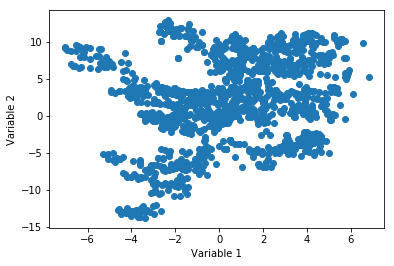

In [8]:
plt.scatter(data['V1'], data['V2'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
# plt.title('Dataset features overview')
plt.show()

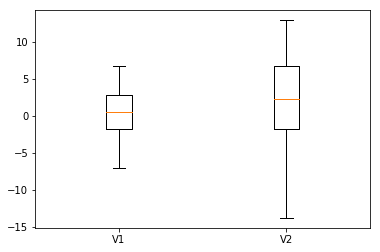

In [9]:
plt.boxplot([data['V1'],data['V2']],labels=['V1','V2'])
# plt.title('Features boxplots')
plt.show()

In [10]:
print(np.mean(data['V1']))
print(np.std(data['V1']))

0.43373525728862977
2.841726405206097


In [11]:
print(np.mean(data['V2']))
print(np.std(data['V2']))

1.9223531209912539
5.866907488271993


In [12]:
column_names_to_normalize = ['V1','V2']
x = data[column_names_to_normalize].values
x_scaled = normalize(x, axis=0)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = data.index)
data[column_names_to_normalize] = df_temp
features = data[column_names_to_normalize]

In [13]:
KMeansModel = KMeans(n_clusters=2)
KMeansModel = KMeansModel.fit(features)

In [14]:
centers = KMeansModel.cluster_centers_
print(centers)

[[-0.01872672 -0.00772292]
 [ 0.02158496  0.02079411]]


In [15]:
res=KMeansModel.predict(features)
data['clus_res']=res

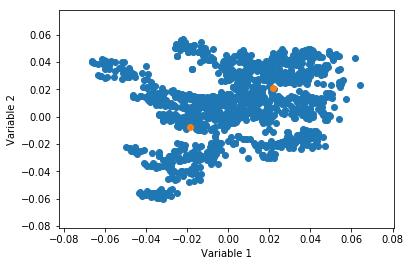

In [16]:
plt.scatter(data['V1'], data['V2'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.scatter(centers[:,0], centers[:,1])
# plt.title('Clusters centers')
plt.show()

In [17]:
labels = ['honest', 'forgery'] 

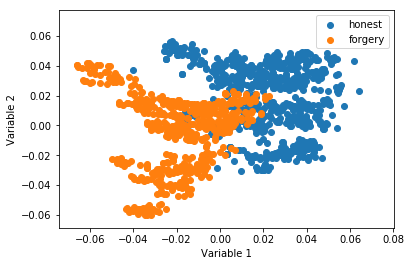

In [18]:
classes = set(data['Class'])
for c in classes:
    clust = data[data['Class']==c]
    plt.scatter(clust['V1'], clust['V2'],label=labels[c])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend()
# plt.title('True class distribution')
plt.show()

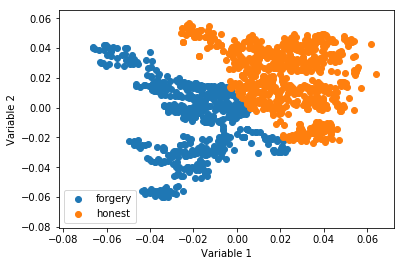

In [19]:

classes = set(data['clus_res'])
for c in classes:
    clust = data[data['clus_res'] == c]
    plt.scatter(clust['V1'], clust['V2'],label = labels[c-1])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')   
plt.legend()
# plt.title('Predicted class distribution')
plt.show()

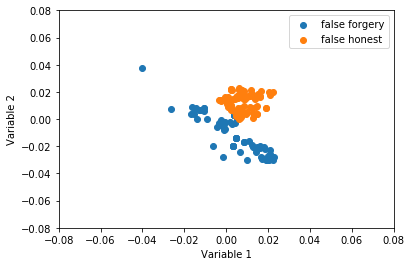

In [20]:
classes = set(data['clus_res'])
false_forgery = data[(data['clus_res'] == 0) & (data['Class'] == 0)]
false_honest = data[(data['clus_res'] == 1) & (data['Class'] == 1)]

plt.scatter(false_forgery['V1'], false_forgery['V2'],label = 'false forgery')
plt.scatter(false_honest['V1'], false_honest['V2'],label = 'false honest')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')   
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.legend()
# plt.title('Model mistakes analysis')
plt.show()

In [21]:
labels

['honest', 'forgery']

In [22]:
print(classification_report(data['Class'], (data['clus_res']+1)%2, target_names=labels))

             precision    recall  f1-score   support

     honest       0.88      0.90      0.89       762
    forgery       0.87      0.85      0.86       610

avg / total       0.88      0.88      0.88      1372



In [23]:
res_array = []
for i in range(20):
    KMeansModel = KMeans(n_clusters=2, n_init=20)
    KMeansModel = KMeansModel.fit(features)
    res = KMeansModel.predict(features)
    data['clus_res']=res
    acc=accuracy_score(data['Class'], (data['clus_res']+1)%2)
    res_array.append(max(acc,1-acc))
# print(res_array)
res_array=np.array(res_array)
print(f'Avarage classification accuracy for 20 attempts: {np.mean(res_array)}')
print(f'Deviation of classification accuracy for 20 attempts: {np.std(res_array)}')

Avarage classification accuracy for 20 attempts: 0.8794825072886298
Deviation of classification accuracy for 20 attempts: 0.00034764548156593366
